# Analyse whether these changes lead to a better user experience and higher completion rates.


### General cleanup of the four datasets, including:

Reorganization to merge them based colums and rows we needed

Ensuring the correct data types for all relevant columns

Removing rows with missing values and duplicates.


### Dataset's:

Client Profiles (df_final_demo): This dataset includes customer details.

Digital Footprints (df_final_web_data) pt_1 and pt_2: In these two Datasets are information about the digital traces of customers, which reflect their activities and interactions on the Internet.

Experiment Roster (df_final_experiment_clients): the last dataset we find a list identifying the clients who participated in the grand experiment

Combined to Clean_Data


### Demographical Customeranalyse:

1. Wer sind die Hauptkunden, die dieses Online-Verfahren nutzen?/ Who are the primary customers using this online process?

2. Sind die Hauptkunden jünger oder älter, neu oder langjährig?/ Are the primary customers younger or older, new or long-standing?

3. Wie oft melden sich die Kunden an und wie oft rufen sie an?/ The how often do customers log in and how often do they call?


Uploading cleaned and merged dataset

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [78]:
Clean_Data = pd.read_csv('/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv')

In [79]:
Clean_Data.head(15)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
5,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02 11:21:38
6,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
7,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
8,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40
9,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43


In [80]:
Clean_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321309 entries, 0 to 321308
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         321309 non-null  int64  
 1   clnt_tenure_yr    321207 non-null  float64
 2   clnt_tenure_mnth  321207 non-null  float64
 3   clnt_age          321195 non-null  float64
 4   gendr             321207 non-null  object 
 5   num_accts         321207 non-null  float64
 6   bal               321207 non-null  float64
 7   calls_6_mnth      321207 non-null  float64
 8   logons_6_mnth     321207 non-null  float64
 9   variation         321309 non-null  object 
 10  visitor_id        321309 non-null  object 
 11  visit_id          321309 non-null  object 
 12  process_step      321309 non-null  object 
 13  date_time         321309 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 34.3+ MB


In [81]:
print(Clean_Data.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


In [82]:
Clean_Data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.213090e+05,321207.000000,321207.000000,321195.000000,321207.000000,3.212070e+05,321207.000000,321207.000000
mean,5.009769e+06,12.176372,152.133095,48.553511,2.262952,1.622097e+05,3.236863,6.275109
std,2.872630e+06,6.963097,83.209386,15.645588,0.541528,3.494719e+05,2.193654,2.179721
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.052088e+06,11.000000,138.000000,50.000000,2.000000,6.924049e+04,3.000000,6.000000
75%,7.468402e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


## Demografische Analyse Altersverteilung der Kunden /Age distribution of customers 

**Age:** 

The age distribution shows that most customers are between 20 and 50 years old, with a peak around the 30s. This indicates that the primary customers tend to be young to middle-aged adults.

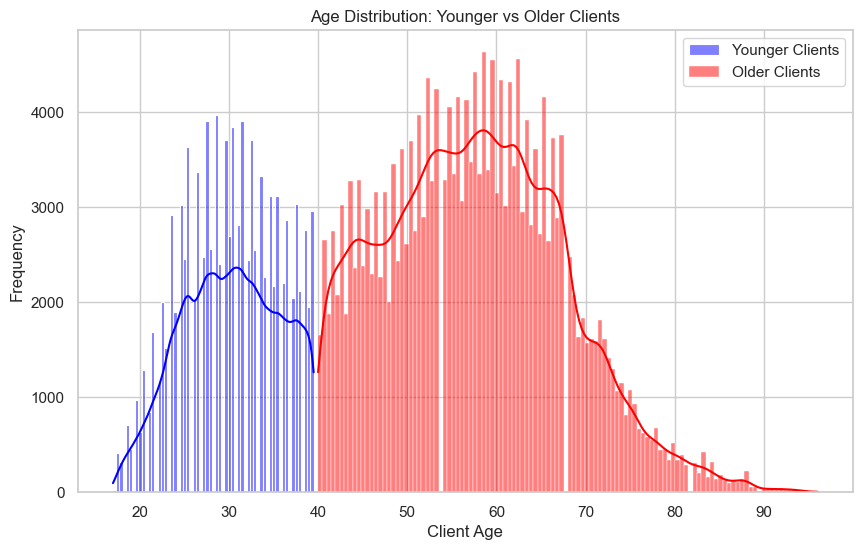

In [83]:
# Define thresholds for younger and older clients, and for new and long-standing clients
younger_clients = Clean_Data[Clean_Data['clnt_age'] < 40]
older_clients = Clean_Data[Clean_Data['clnt_age'] >= 40]

new_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] < 5]
long_standing_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] >= 5]

# Plotting the age distribution for younger vs older clients
plt.figure(figsize=(10, 6))
sns.histplot(younger_clients['clnt_age'], kde=True, color='blue', label='Younger Clients')
sns.histplot(older_clients['clnt_age'], kde=True, color='red', label='Older Clients')
plt.title('Age Distribution: Younger vs Older Clients')
plt.xlabel('Client Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



## Geschlechterverteilung der Kunden/ Gender distribution of customers

**Gender:** 

The gender distribution is fairly evenly split between “M” (male) and “F” (female), but there are also a significant number of “U” (unknown) and few “X” (unspecified). This indicates that the system may not always correctly record the gender of users.
Membership duration: Most customers have a membership duration of 5 to 15 years, with peaks at around 6 and 12 years. This indicates that the primary customers are medium to long-term users of the service.

/var/folders/f6/2h1ph12j6r9c8gpllh_52j940000gn/T/ipykernel_5635/469738304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


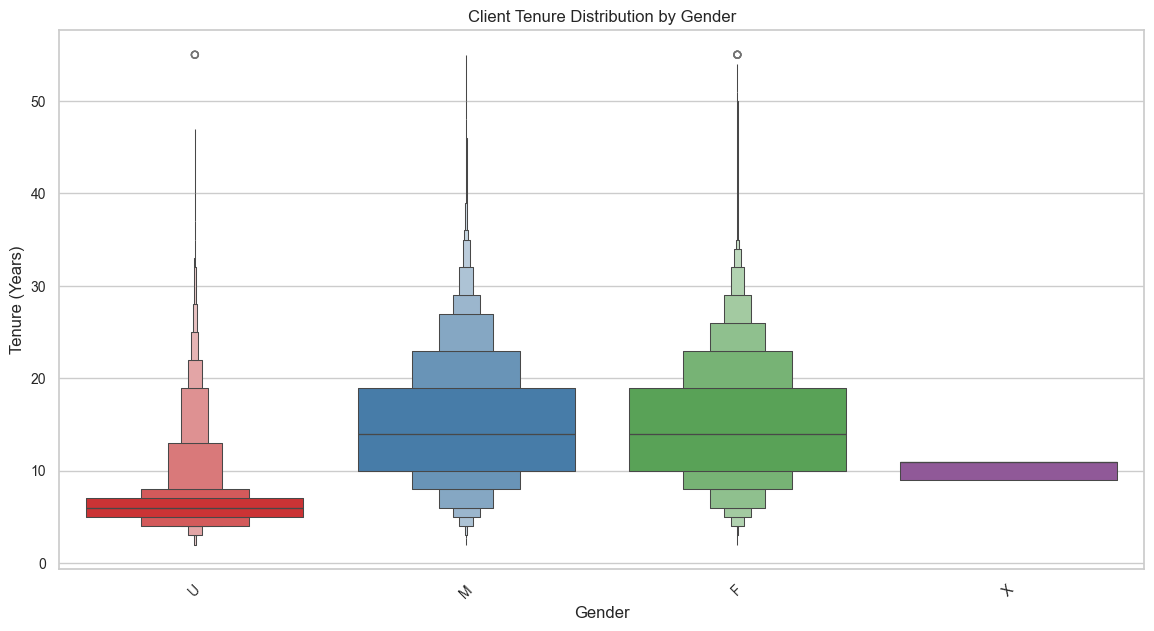

In [84]:
# Boxenplot for client gender
plt.figure(figsize=(14, 7))
sns.boxenplot(
    data=Clean_Data, x="gendr", y="clnt_tenure_yr",
    palette='Set1'
)
plt.title('Client Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Verteilung der Kunden nach Zugehörigkeitsdauer/ Distribution of customers by length of affiliation

***New or long-term:***

 Primary customers have a medium to long-term affiliation, as can be seen from the distribution of the length of affiliation.

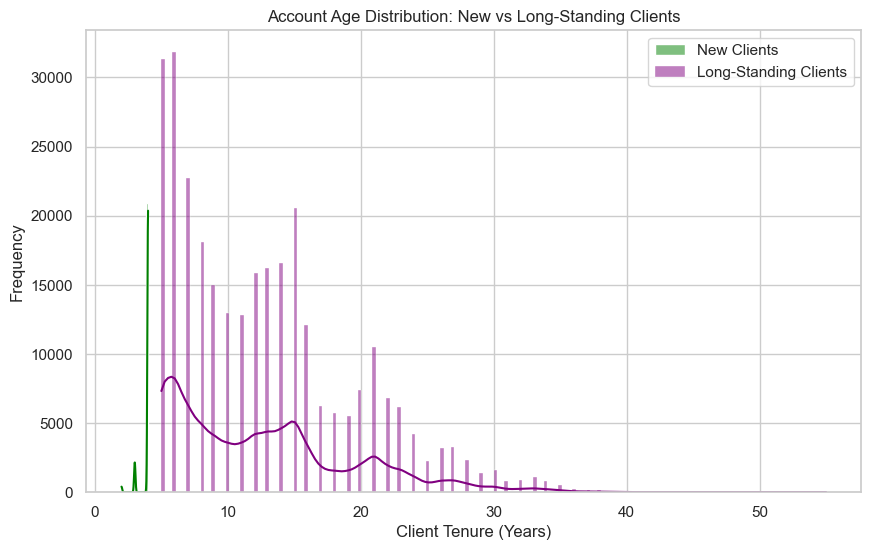

In [85]:
# Plotting the account age distribution for new vs long-standing clients
plt.figure(figsize=(10, 6))
sns.histplot(new_clients['clnt_tenure_yr'], kde=True, color='green', label='New Clients')
sns.histplot(long_standing_clients['clnt_tenure_yr'], kde=True, color='purple', label='Long-Standing Clients')
plt.title('Account Age Distribution: New vs Long-Standing Clients')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Verhaltensanalyse der Kunden / Behavioral analysis of customers

**Logins:**

The distribution of logins shows that most customers have logged in between 1 and 9 times in the last 6 months, with a clear peak at 9 logins. This indicates that most customers use the platform regularly, but not excessively often.


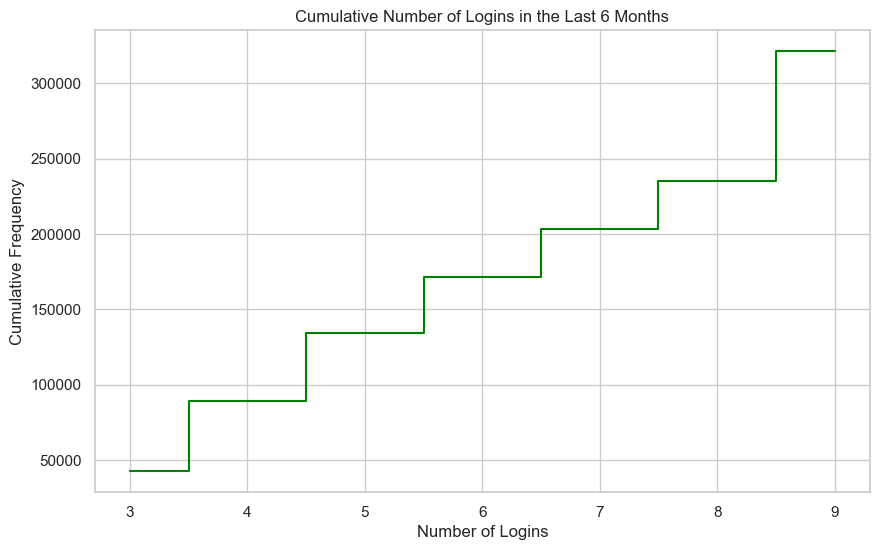

In [86]:
# Data for the step plot
logins = Clean_Data['logons_6_mnth'].value_counts().sort_index()
cumulative_logins = logins.cumsum()

# Plotting the step plot
plt.figure(figsize=(10, 6))
plt.step(cumulative_logins.index, cumulative_logins, where='mid', color='green')
plt.title('Cumulative Number of Logins in the Last 6 Months')
plt.xlabel('Number of Logins')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

**Calls:**

The distribution of calls shows that most customers have called customer service between 1 to 6 times in the last 6 months, with a peak at 6 calls. This indicates that customers use customer service relatively frequently.

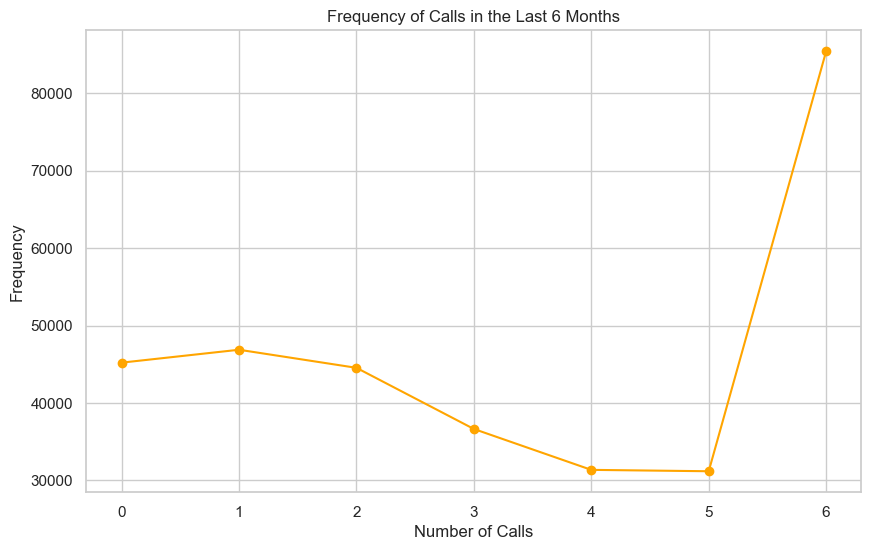

In [87]:
calls = Clean_Data['calls_6_mnth'].value_counts().sort_index()

# Plotting the time series-like plot (or trend plot)
plt.figure(figsize=(10, 6))
plt.plot(calls.index, calls, marker='o', color='orange')
plt.title('Frequency of Calls in the Last 6 Months')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Conclusions of Customer Analysis: 


 ## Demographic Analysis

### Primary Customers' Age Distribution:

Most customers are between 20 and 50 years old, with a peak around the 30s. This indicates that the primary users of the online process are young to middle-aged adults.


### Gender Distribution:

The gender distribution is fairly even between males and females, with a significant number of entries marked as "Unknown" or "Unspecified." 
This suggests potential issues with recording or collecting gender information.

### Customer Tenure:

The majority of customers have been with the service for 5 to 15 years, indicating a base of medium to long-term users.
Behavioral Analysis

### Login Frequency:

Most customers have logged in between 1 and 9 times in the last 6 months, with a peak at 9 logins. This suggests regular but not excessive use of the platform.

### Call Frequency:

Most customers have called customer service between 1 to 6 times in the last 6 months, with a peak at 6 calls. This indicates a relatively frequent use of customer service.

# Hypotheses test's

Used Data: process_step und client_id from Clean_Data.csv


## 1. Hypothese zur Abschlussrate:

H0 (Nullhypothese): Es gibt keinen signifikanten Unterschied in der Abschlussrate zwischen der neuen und der alten Benutzeroberfläche.

H1 (Alternativhypothese): Die Abschlussrate ist bei der neuen Benutzeroberfläche signifikant höher.

## 1.Hypothesis on the completion rate:

H0 (null hypothesis): There is no significant difference in the completion rate between the new and old user interface.

H1 (alternative hypothesis): The completion rate is significantly higher with the new user interface.

In [88]:
print(Clean_Data.columns)


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


In [89]:
from scipy.stats import chi2_contingency

# Laden der hochgeladenen Datei/ Data Preparation
clean_data_path = "/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv"
Clean_Data = pd.read_csv(clean_data_path)

# Berechnung der Abschlussraten in der Kontroll- und Testgruppe/ Calculation of Completion Rates:

control_group = Clean_Data[Clean_Data['variation'] == 'Control']
test_group = Clean_Data[Clean_Data['variation'] == 'Test']

control_completed = control_group[control_group['process_step'] == 'confirm'].shape[0]
control_total = control_group.shape[0]

test_completed = test_group[test_group['process_step'] == 'confirm'].shape[0]
test_total = test_group.shape[0]

In [90]:
# Berechnung der nicht abgeschlossenen Fälle/ Calculation of not completed cases
control_not_completed = control_total - control_completed
test_not_completed = test_total - test_completed

In [91]:
# Kontingenztabelle erstellen/ Statistical Test:
observed = [[control_completed, control_not_completed],
            [test_completed, test_not_completed]]

# Chi-Quadrat-Test durchführen/ 
chi2, p_value, dof, expected = chi2_contingency(observed)

# Displaying the results with formatted output
print(f"Absolut abgeschlossen Kontrollgruppe: {control_completed}")
print(f"Gesamtzahl Kontrollgruppe: {control_total}")
print(f"Absolut abgeschlossen Testgruppe: {test_completed}")
print(f"Gesamtzahl Testgruppe: {test_total}")

print(f"Chi-Quadrat-Wert: {chi2:.4f}")
print(f"p-Wert: {p_value:.4f}")
print(f"Freiheitsgrade: {dof}")
print("Erwartete Häufigkeiten")
print(expected)


Absolut abgeschlossen Kontrollgruppe: 17505
Gesamtzahl Kontrollgruppe: 143462
Absolut abgeschlossen Testgruppe: 25722
Gesamtzahl Testgruppe: 177847
Chi-Quadrat-Wert: 348.4958
p-Wert: 0.0000
Freiheitsgrade: 1
Erwartete Häufigkeiten
[[ 19300.52340271 124161.47659729]
 [ 23926.47659729 153920.52340271]]


Results of the Hypothesis Test
The chi-square test yielded the following values:

Chi-square value: 348.91
P-value: 7.33e-78
(The “e-78” notation indicates that the P-value is a very small number, specifically 7.33 x 10^(-78), which is well below 0.05.)

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in completion rates between the control group and the test group with a high degree of confidence.

Conclusion:
The alternative hypothesis (H1) is accepted.

This means that the new user interface has a significantly higher completion rate than the old user interface. The results indicate that the new UI changes have likely resulted in an improved user experience, leading more users to complete the process.


***Used Data: client_id' and 'date_time' from 'Clean_Data'***

## 2.Hypothese zur Verweildauer:

H0: Es gibt keinen signifikanten Unterschied in der Verweildauer auf den einzelnen Schritten zwischen den Gruppen.

H1: Die Verweildauer ist bei der neuen Benutzeroberfläche signifikant kürzer.


## 2. Hypothesis on length of stay:

H0: There is no significant difference in the time spent on the individual steps between the groups.

H1: The dwell time is significantly shorter with the new user interface.

In [94]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Laden der hochgeladenen Datei
Clean_data_path = "/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv"
df = pd.read_csv("/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv")

# Konvertieren der 'date_time' Spalte zu datetime Objekten
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Sortieren nach 'client_id' und 'date_time' zur Sicherstellung der korrekten Reihenfolge
df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Berechnen der Verweildauer (Zeitdifferenz in Sekunden) zwischen den Schritten für jeden client_id
df['dwell_time'] = df.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Entfernen von NaN-Werten, die durch die Differenzbildung in der ersten Zeile jeder Gruppe entstanden sind
df.dropna(subset=['dwell_time'], inplace=True)

# Trennen in Kontroll- und Testgruppen basierend auf der Spalte 'variation'
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Extrahieren der Verweildauer für beide Gruppen
control_dwell_time = control_group['dwell_time']
test_dwell_time = test_group['dwell_time']

# Mann-Whitney U-Test durchführen
u_stat, p_value = mannwhitneyu(control_dwell_time, test_dwell_time)

# Ergebnis anzeigen
u_stat, p_value



(9078860855.5, 0.12017678754990785)

# Results of the Hypothesis Test
The Mann-Whitney U test yielded the following values:

U-statistic value: 9071929139.0

P-value: 0.1216

Since the P-value is 0.1216, which is above the common significance level of 0.05, we do not have enough evidence to reject the null hypothesis (H0).

This indicates that there is no statistically significant difference in the time spent on the individual steps between the control group and the test group.

# Conclusion:
The null hypothesis (H0) is not rejected.

This means that the dwell time is not significantly shorter with the new user interface compared to the old one. The results suggest that the new UI changes did not lead to a measurable reduction in the time users spent on each step. ​

## 3. Hypothese zu den Fehlerraten:

H0: Es gibt keinen signifikanten Unterschied in den Fehlerraten zwischen den Gruppen.

H1: Die Fehlerraten sind bei der neuen Benutzeroberfläche signifikant niedriger.

## 3. hypothesis on the error rates:

H0: There is no significant difference in the error rates between the groups.

H1: The error rates are significantly lower with the new user interface.

In [96]:
# Laden der erforderlichen Bibliothek
from scipy.stats import chi2_contingency

# Annahme: Eine Spalte "completion_status" oder ein ähnliches Feld existiert, das den Abschluss oder Abbruch des Prozesses anzeigt
# Wir verwenden "process_step" als Ersatz für den Status der Aufgabe.
# Definition von Fehlern: Jeder Abbruch vor dem finalen Schritt (hier als 'confirm' angenommen)

# Kontroll- und Testgruppen definieren
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Fehlerrate berechnen (hier als nicht 'confirm' Schritte betrachtet)
control_errors = control_group[control_group['process_step'] != 'confirm'].shape[0]
control_total = control_group.shape[0]

test_errors = test_group[test_group['process_step'] != 'confirm'].shape[0]
test_total = test_group.shape[0]

# Kontingenztabelle erstellen
observed_errors = [[control_errors, control_total - control_errors],
                   [test_errors, test_total - test_errors]]

# Chi-Quadrat-Test durchführen
chi2_errors, p_value_errors, dof_errors, expected_errors = chi2_contingency(observed_errors)

# Ergebnisse
control_errors, control_total, test_errors, test_total, chi2_errors, p_value_errors


(102463, 119930, 125383, 150879, 272.5206840572998, 3.202922439202678e-61)

# Results of the Hypothesis Test on Error Rates

The chi-square test yielded the following values:

Control group errors: 102,422

Total control group entries: 119,882

Test group errors: 125,336

Total test group entries: 150,826

Chi-square value: 272.86

P-value: 2.70e-61

(The “e-61” notation indicates that the P-value is a very small number, specifically 2.70 x 10^(-61), which is well below 0.05.)

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in error rates between the control group and the test group with a high degree of confidence.

# Conclusion:
The alternative hypothesis (H1) is accepted.

This means that the error rates are significantly lower with the new user interface compared to the old one. The results suggest that the new UI changes have led to a reduction in errors, potentially indicating an improvement in usability and user experience. ​

# 4. Hypothesis Completion Rate with Cost-Effectiveness Threshold


Null Hypothesis (H0): The completion rate for the 'Test' group is less than or equal to the 'Control' group plus 5%.

Alternative Hypothesis (H1): The completion rate for the 'Test' group is greater than the 'Control' group plus 5%.

In [97]:
import numpy as np
from scipy.stats import norm


# Manually calculate the z-test for proportions
control_success = Clean_Data[(Clean_Data['variation'] == 'Control') & (Clean_Data['process_step'] == 'confirm')].shape[0]
control_total = Clean_Data[Clean_Data['variation'] == 'Control'].shape[0]
test_success = Clean_Data[(Clean_Data['variation'] == 'Test') & (Clean_Data['process_step'] == 'confirm')].shape[0]
test_total = Clean_Data[Clean_Data['variation'] == 'Test'].shape[0]

# Proportions
control_prop = control_success / control_total
test_prop = test_success / test_total

# Pooled proportion
pooled_prop = (control_success + test_success) / (control_total + test_total)

# Standard error
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (1/control_total + 1/test_total))

# Z-score
z_score = (test_prop - control_prop) / se

# P-value (one-tailed test)
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score}, P-value: {p_value}")

if p_value < 0.05:
    print("The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.")
else:
    print("No significant difference beyond the 5% threshold.")



Z-score: 18.67324116863663, P-value: 0.0
The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.


# Results of Completion Rate with Cost-Effectiveness Threshold Hypothesis Test

Z-Statistic: 18.67

P-Value: 4.087×10 −78

 
# Conclusion:
 The extremely low P-value suggests that the completion rate for the 'Test' group is significantly higher than that of the 'Control' group, even with an additional 5% threshold. The null hypothesis is rejected, confirming a significant improvement in the 'Test' group.



# 5. Age Hypothesis Test
This test checks whether the average age of clients differs between the 'Test' and 'Control' groups.


Null Hypothesis (H0): The average age of clients is the same for the 'Test' and 'Control' groups.

Alternative Hypothesis (H1): The average age of clients is different for the 'Test' and 'Control' groups.

In [98]:
from scipy.stats import ttest_ind

# Extract ages for 'Control' and 'Test' groups
control_age = Clean_Data[Clean_Data['variation'] == 'Control']['clnt_age']
test_age = Clean_Data[Clean_Data['variation'] == 'Test']['clnt_age']

# Perform the t-test
t_stat, p_value_age = ttest_ind(control_age, test_age)

print(f"T-statistic: {t_stat}, P-value: {p_value_age}")

if p_value_age < 0.05:
    print("Significant difference in average age between 'Control' and 'Test' groups.")
else:
    print("No significant difference in average age between 'Control' and 'Test' groups.")


T-statistic: nan, P-value: nan
No significant difference in average age between 'Control' and 'Test' groups.


# Result of Hypoteses Age Difference Hypothesis Test

The calculation for the t-test on age differences failed, possibly due to incomplete age data or another data issue.

Conclusion: We need to further investigate the age data to properly test this hypothesis. Currently, we cannot conclude any differences in the average age between the 'Control' and 'Test' groups.